<span style='font-family:serif'>
    
# <center>$Machine   Learning   From   Scratch$</center>
# <center><span style='background:yellow'>Regressão Linear</span></center>
<center>$Rafael Pavan$</center>



<span style='font-family:serif'>
    
## 1. Introdução



A Regressão Linear é um método de aprendizado supervisionado baseado em otimização, que tem como objetivo prever números contı́nuos minimizando a diferença entre os valores previstos pelo método e os valores reais, através da técnica do gradiente. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from random import randrange
rcParams['font.family'] = 'sans-serif'

<span style='font-family:serif'>
    
## 2. Importando e Pré-Visualizando os Dados
    
Os dados representam a o orçamento de final de mês das prefeituras de cidades do Brasil com base no tamanho da população.


In [2]:
df = pd.read_csv( 'dados.txt', sep=',')

In [3]:
df.head()

,tamanho_populacao,orcamento
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X = df.iloc[:, 0:-1].values

Y = df.iloc[:, -1].values #TARGET

print('X:', X[0:5,:])

print('Y:', Y[0:5])

X: [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
Y: [17.592   9.1302 13.662  11.854   6.8233]


Agora, vamos criar uma função para plotar os dados.

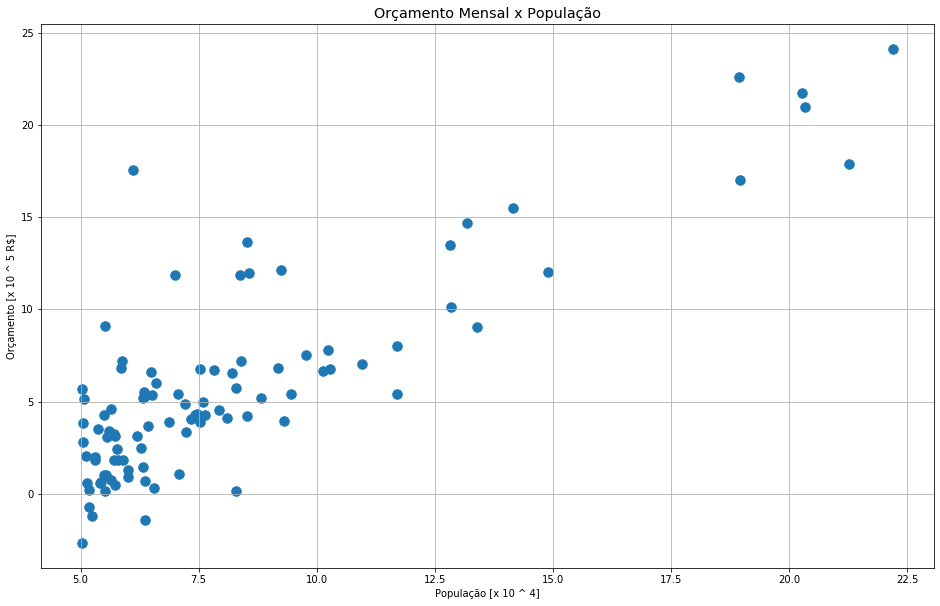

In [5]:
def visualizaDados(X,Y):

    """
    Função usada para plotar os dados.
    """
    plt.figure(figsize=(16,10))
    plt.scatter(X,Y, marker='o', s=90)
    plt.ylabel('Orçamento [x 10 ^ 5 R$]',fontsize='medium') 
    plt.xlabel('População [x 10 ^ 4]',fontsize='medium') 
    plt.title('Orçamento Mensal x População', fontsize='x-large')
    plt.grid()
    
visualizaDados(X,Y)

plt.show()

<span style='font-family:serif'>
    
## 2. Função Objetivo e Gradiente
    
A técnica do gradiente é uma das diversas técnicas utilizadas para se determinar o ponto ótimo de uma função, visando minimizar ou maximizar a função objetivo. A função de custo $(J)$ do problema de regressão linear é o erro quadrático médio (MSE), que representa a média das diferenças entre o valor previsto e o valor real.
    
O valor previsto $(\Phi)$ em uma regressão linear, é dado pela seguinte equação:
    
     
      

$$ \Phi(x) = \Theta_0 + \Theta_1 x_1 + \Theta_2 x_2, + ...., + \Theta_n x_n $$ 
    
      
Onde:
    
     
- $\Theta_0$ : Coeficiente Linear;
    
    
- $\Theta_1....n$ : Coeficientes Angulares;

    
- $x$ : Variável do Problema. Em caso de regressão linear múltipla, há mais de uma.
    
Este problema pode ser representado por uma regressão linear simples, com uma variável dependente:
    
$$ f(x) = \Theta_0 + \Theta_1 x_1$$ 

    
A função objetivo do problema $(J)$ pode ser representada por:
    
    
$$ J(\Theta_0, \Theta_1, ..., \Theta_n) = \frac{1}{m} \sum_{i=1}^{m} \left( \Phi\left(x^{(i)}\right)-y^{(i)} \right)^2 $$

    
O gradiente ajuda a otimizar a melhor combinação de parâmetros para a regressão. O gradiente nada mais é do que um vetor com derivadas parciais. Em cada passo do gradiente descendente, o valor de ($\theta$) é atualizado pela equação:

$$\theta_j := \theta_j  - \alpha \frac{\partial}{\partial \theta_j} J(\Theta_0, \Theta_1, ..., \Theta_n) \text{,}$$ onde

$$ \frac{\partial}{\partial \theta_j} J(\Theta_0, \Theta_1, ..., \Theta_n)=\left\{
  \begin{array}{@{}ll@{}}
    \frac{1}{m} \sum_{i=1}^{m} \left( \Phi\left(x^{(i)}\right)-y^{(i)} \right), & \text{se}\ j=0 \\
    \frac{1}{m} \sum_{i=1}^{m} \left( \Phi\left(x^{(i)}\right)-y^{(i)} \right) x^{(i)}, & \text{se}\ j>0
  \end{array}\right.
$$

A cada etapa o gradiente vai direcionando o valor de $(\Theta)$ a um ponto onde o valor de $J_{posterior}$ < $J_{anterior}$, até que encontre o valor ótimo. A função de custo estudada é convexa, ou seja, não apresenta pontos de mínimos locais, garantindo um bom desempenho do gradiente descendente. Em casos onde há mínimos locais, outras estratégias são implementadas para garantir uma boa solução.

Agora, vamos implementar a função objetivo $(J)$:

In [6]:
m = len(X) # número de amostras

X = np.column_stack((np.ones(m),X)) # Adicionar uma coluna de 1s em x para o coeficiente linear

theta = np.zeros(2) # Inicializa coeficientes que serao ajustados (linear e âgular)

n_iter = 2000

passo = 0.01

print(X[:5])


[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [7]:
def func_objetivo(X, Y, theta):
    
    """
    
    Calcula o custo para cada observação.
    
    """
    
    m = len(Y) 
    
    J = 0

    
    J = np.sum(np.square(np.sum(theta*X,axis=1)-Y),axis=0)/(2*m)       
    
    
    return J


J = func_objetivo(X, Y, theta)

J


32.072733877455676

In [8]:
def gradiente(X, Y, theta, alpha, num_iter):
    
    """
    
    Executa o gradiente descente para otimizar os parâmetros. 
    
    """

    m = len(Y) 
    Jota = np.zeros(num_iter)
    
    for i in range(num_iter):
    
        grad = np.zeros(theta.shape)
        
        for j in range(theta.shape[0]):
            if j == 0:
                grad[j] = np.sum((np.sum(theta*X,axis=1)-Y))/m
            else:
                grad[j] = np.dot(X[:,j].T,np.sum(theta*X,axis=1)- Y)/(m)
                                
        theta = theta - alpha*grad
     
        Jota[i] = func_objetivo(X, Y, theta)
        
    return theta, Jota

theta = np.zeros(2)

theta, J_passado = gradiente(X, Y, theta, passo, n_iter)

print('Theta Otimizado:')
print(theta[0], theta[1])

Theta Otimizado:
-3.7880685727231103 1.182212774757377


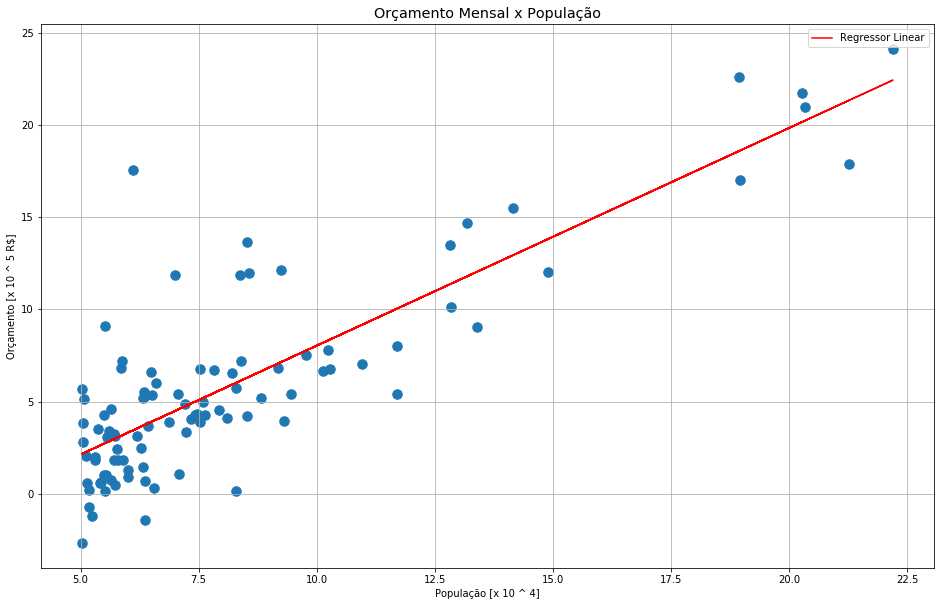

In [9]:
visualizaDados(X[:,1],Y)

plt.plot(X[:,1], np.dot(X,theta), label = 'Regressor Linear', color='red') 

plt.legend()

plt.show()

<span style='font-family:serif'>

Vamos visualizar agora a convergência do algoritmo, através da análise do histórico dos valores da função objetivo:

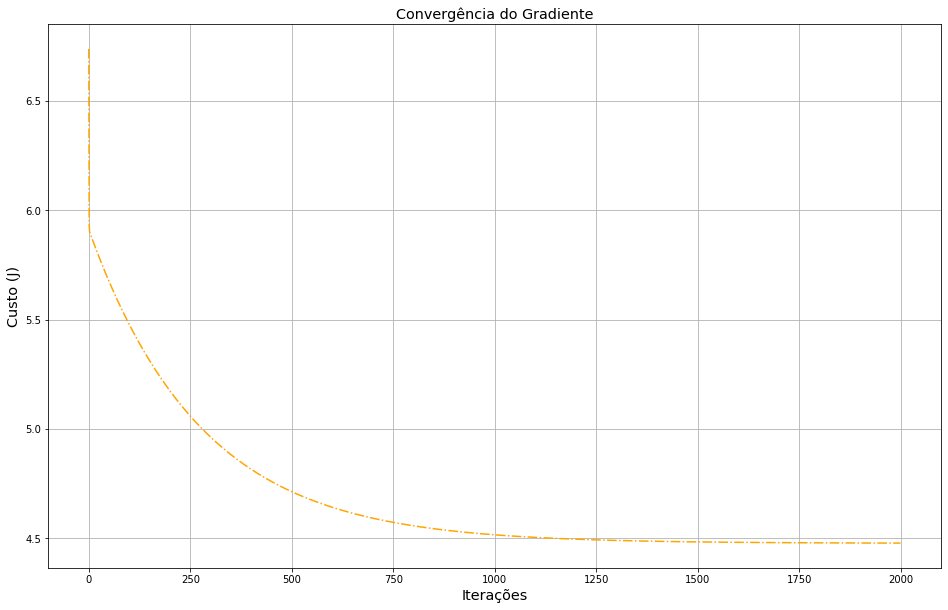

In [10]:
plt.figure(figsize=(16,10))


plt.plot(J_passado, color='orange', linestyle='-.', linewidth=1.5) 
plt.xlabel('Iterações',fontsize='x-large') 
plt.ylabel('Custo (J)',fontsize='x-large') 
plt.title(r'Convergência do Gradiente', fontsize='x-large')
plt.grid()
plt.show()

<span style='font-family:serif'>

Como pode-se notar, o algoritmo converge para o custo de 4.5, que é o mínimo da função para este problema em específico. 